## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

**Import Necessary Libraries**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [5]:
df1 = pd.read_csv("employees_work_hours_data.csv")
df1.shape
df1.head()

,employee_id,department,remote_working,hours_worked_per_day
0,E0001,HR,No,10.1
1,E0002,HR,No,8.5
2,E0003,IT,Yes,9.2
3,E0004,Marketing,No,10.7
4,E0005,Marketing,Yes,10.2


### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [20]:
mean = round(df1["hours_worked_per_day"].mean(),1)
std = round(df1["hours_worked_per_day"].std(),1)
mean,std

(8.0, 1.3)

### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [21]:
df1["z_score"] = (df1["hours_worked_per_day"]-mean)/std

df1

,employee_id,department,remote_working,hours_worked_per_day,z_score
0,E0001,HR,No,10.1,1.615385
1,E0002,HR,No,8.5,0.384615
2,E0003,IT,Yes,9.2,0.923077
3,E0004,Marketing,No,10.7,2.076923
4,E0005,Marketing,Yes,10.2,1.692308
...,...,...,...,...,...
2795,E2796,Marketing,No,7.6,-0.307692
2796,E2797,HR,No,6.9,-0.846154
2797,E2798,Sales,Yes,8.4,0.307692
2798,E2799,IT,Yes,6.3,-1.307692


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [24]:
outliers = df1[(df1.z_score<-3)|(df1.z_score>3)]
print("Number of outliers:", outliers.shape[0])
outliers

Number of outliers: 28


,employee_id,department,remote_working,hours_worked_per_day,z_score
153,E0154,Sales,No,13.8,4.461538
220,E0221,IT,Yes,14.6,5.076923
251,E0252,HR,No,1.6,-4.923077
288,E0289,Sales,No,15.7,5.923077
496,E0497,Marketing,Yes,1.2,-5.230769
630,E0631,Sales,No,2.4,-4.307692
712,E0713,HR,No,17.9,7.615385
757,E0758,Marketing,Yes,14.1,4.692308
806,E0807,Marketing,Yes,14.6,5.076923
881,E0882,Sales,No,2.6,-4.153846


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

In [28]:
new_data = df1[(df1.z_score>-3)&(df1.z_score<3)]
new_data.shape

(2772, 5)

<AxesSubplot:xlabel='z_score', ylabel='Count'>

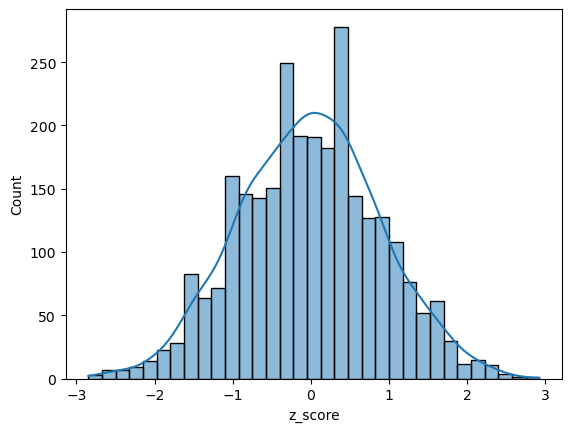

In [27]:
sns.histplot(new_data["z_score"],kde=True)